In [667]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [668]:
data = pd.read_csv("train.csv")

In [669]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [670]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

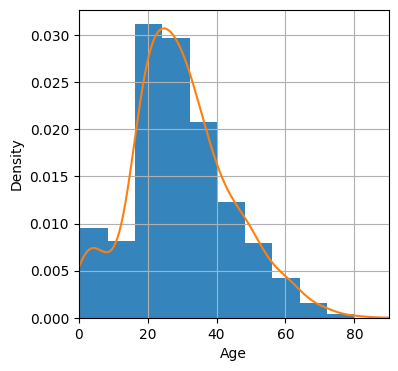

In [671]:
ax = plt.figure(figsize=(4,4))
ax = data['Age'].hist(bins=10, density=True, stacked=True, alpha=0.9)

data['Age'].plot(kind='density')

ax.set(xlabel='Age')
plt.xlim(0, 90)
plt.grid()
plt.show()

In [672]:
data['Age'].median(skipna=True) 

28.0

In [673]:
data['Cabin'].isnull().sum() 

687

In [674]:
print(data['Embarked'].value_counts() / data.shape[0] * 100)

S    72.278339
C    18.855219
Q     8.641975
Name: Embarked, dtype: float64


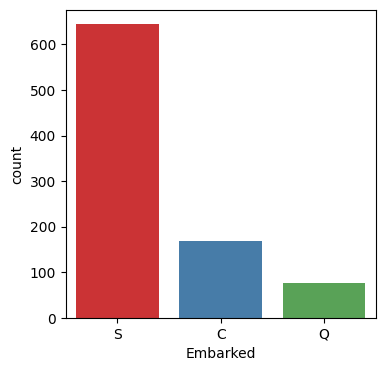

In [675]:
ax = plt.figure(figsize=(4,4))
ax = sns.countplot(x='Embarked', data=data, palette='Set1')
plt.show()

We have enough data to fill in the blank age data.
We will delete cabin information instead of filling it because we have too much lost data rate.
We will calculate the port where the passengers boarded. This is not a numerical value, we cannot calculate it like age. So we will fill the empty ones with it, whichever port was used the most.

In [676]:
train_data = data.copy()

In [677]:
train_data["Age"].fillna(data["Age"].median(skipna=True),inplace=True)

In [678]:
train_data["Embarked"].fillna(data["Embarked"].value_counts().idxmax(),inplace=True)

In [679]:
train_data.drop('Cabin', axis=1, inplace=True)

In [680]:
train_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [681]:
train_data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
5,6,0,3,"Moran, Mr. James",male,28.0,0,0,330877,8.4583,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,C


here are two columns named sibsp and parch.
sibps shows the number of children for parents.
parch is the number of parents for children.
we will combine them, if the sum of these two values is 0 then this person is traveling alone but otherwise this person is not traveling alone

In [682]:
train_data['Alone'] = np.where((train_data["SibSp"] + train_data["Parch"]) > 0, 0, 1)

In [683]:
train_data.drop('SibSp', axis=1, inplace=True)

train_data.drop('Parch', axis=1, inplace=True)

In [684]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Embarked,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1000,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,373450,8.0500,S,1


We will encode categorical columns.

In [685]:
train_data = pd.get_dummies(train_data, columns=["Pclass","Embarked","Sex"], drop_first=True)

In [686]:
train_data.head()

,PassengerId,Survived,Name,Age,Ticket,Fare,Alone,Pclass_2,Pclass_3,Embarked_Q,Embarked_S,Sex_male
0,1,0,"Braund, Mr. Owen Harris",22.0,A/5 21171,7.2500,0,0,1,0,1,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,PC 17599,71.2833,0,0,0,0,0,0
2,3,1,"Heikkinen, Miss. Laina",26.0,STON/O2. 3101282,7.9250,1,0,1,0,1,0
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,113803,53.1000,0,0,0,0,1,0
4,5,0,"Allen, Mr. William Henry",35.0,373450,8.0500,1,0,1,0,1,1


In [687]:
train_data.drop('PassengerId', axis=1, inplace=True)
train_data.drop('Name', axis=1, inplace=True)
train_data.drop('Ticket', axis=1, inplace=True)

In [688]:
train_data.head()

,Survived,Age,Fare,Alone,Pclass_2,Pclass_3,Embarked_Q,Embarked_S,Sex_male
0,0,22.0,7.2500,0,0,1,0,1,1
1,1,38.0,71.2833,0,0,0,0,0,0
2,1,26.0,7.9250,1,0,1,0,1,0
3,1,35.0,53.1000,0,0,0,0,1,0
4,0,35.0,8.0500,1,0,1,0,1,1


In [689]:
col_names = train_data.columns

col_names

Index(['Survived', 'Age', 'Fare', 'Alone', 'Pclass_2', 'Pclass_3',
       'Embarked_Q', 'Embarked_S', 'Sex_male'],
      dtype='object')

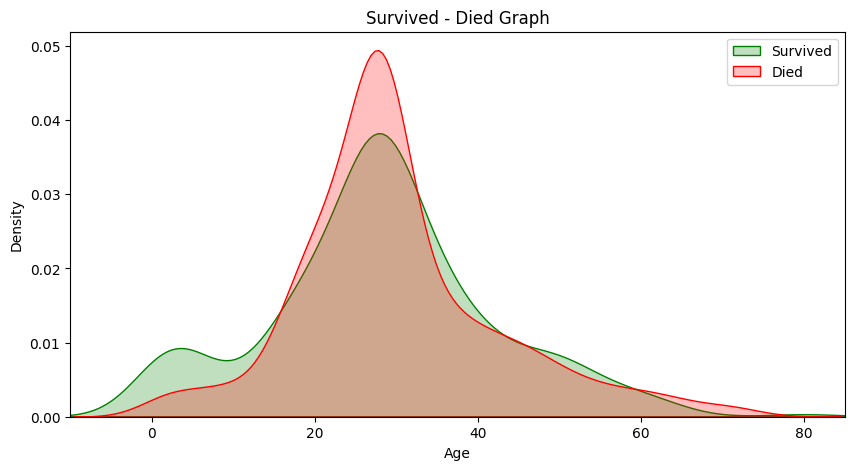

In [690]:
plt.figure(figsize=(10,5))

ax = sns.kdeplot(train_data["Age"][train_data.Survived == 1], color="green", shade=True)

sns.kdeplot(train_data["Age"][train_data.Survived == 0], color="red", shade=True)

plt.legend(['Survived', 'Died'])
plt.title('Survived - Died Graph')
ax.set(xlabel='Age')
plt.xlim(-10,85)
plt.show()

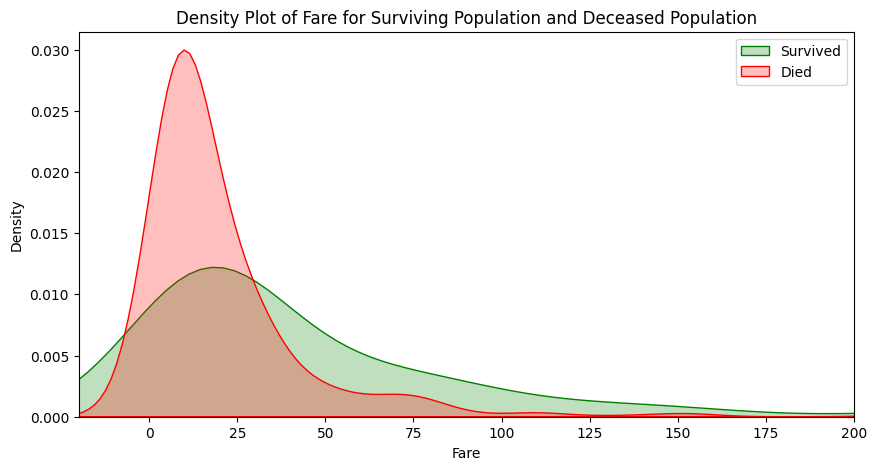

In [691]:
plt.figure(figsize=(10,5))

ax = sns.kdeplot(train_data["Fare"][train_data.Survived == 1], color="green", shade=True)

sns.kdeplot(train_data["Fare"][train_data.Survived == 0], color="red", shade=True)

plt.legend(['Survived', 'Died'])
plt.title('Density Plot of Fare for Surviving Population and Deceased Population')
ax.set(xlabel='Fare')
plt.xlim(-20,200)
plt.show()

1st class passengers have a higher survival rate

In [692]:
y = train_data['Survived']

In [693]:
train_data.drop('Survived', axis=1, inplace=True)

In [694]:
train_data.describe()

,Age,Fare,Alone,Pclass_2,Pclass_3,Embarked_Q,Embarked_S,Sex_male
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,29.361582,32.204208,0.602694,0.206510,0.551066,0.086420,0.725028,0.647587
std,13.019697,49.693429,0.489615,0.405028,0.497665,0.281141,0.446751,0.477990
min,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,22.000000,7.910400,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,28.000000,14.454200,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000
75%,35.000000,31.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000
max,80.000000,512.329200,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [695]:
cols = train_data.columns
cols

Index(['Age', 'Fare', 'Alone', 'Pclass_2', 'Pclass_3', 'Embarked_Q',
       'Embarked_S', 'Sex_male'],
      dtype='object')

In [696]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder


In [697]:

# Create a LabelEncoder object
label_encoder = LabelEncoder()

# Encode the non-numeric data in the train_data
for col in train_data.columns:
    if train_data[col].dtype == 'object':
        train_data[col] = label_encoder.fit_transform(train_data[col])
        
# Apply the MinMaxScaler() to the train_data
scaler = MinMaxScaler()
train_data = scaler.fit_transform(train_data)

In [698]:
train_data = pd.DataFrame(train_data, columns=[cols]) 

In [699]:
train_data.head()

,Age,Fare,Alone,Pclass_2,Pclass_3,Embarked_Q,Embarked_S,Sex_male
0,0.271174,0.014151,0.0,0.0,1.0,0.0,1.0,1.0
1,0.472229,0.139136,0.0,0.0,0.0,0.0,0.0,0.0
2,0.321438,0.015469,1.0,0.0,1.0,0.0,1.0,0.0
3,0.434531,0.103644,0.0,0.0,0.0,0.0,1.0,0.0
4,0.434531,0.015713,1.0,0.0,1.0,0.0,1.0,1.0


In [700]:
from sklearn.model_selection import train_test_split

In [701]:
X_train, X_test, y_train, y_test = train_test_split(train_data, y, test_size=0.2, random_state=2)

In [702]:
from sklearn.linear_model import LogisticRegression

In [703]:
from sklearn.linear_model import LogisticRegression

In [704]:
logreg = LogisticRegression(solver="liblinear",random_state=0)

In [705]:
logreg.fit(X_train, y_train)

LogisticRegression(random_state=0, solver='liblinear')

In [706]:
y_pred = logreg.predict(X_test)

y_pred

array([0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 1], dtype=int64)

If this value greater than 0.5, they died 
# 0  -> (Survived = 0)

In [707]:
logreg.predict_proba(X_test)[:,0]

array([0.71566808, 0.9106929 , 0.19335168, 0.9164709 , 0.4411967 ,
       0.9240331 , 0.84048156, 0.91693815, 0.70595606, 0.74276278,
       0.78893909, 0.14453791, 0.33297568, 0.9164709 , 0.9164709 ,
       0.45089004, 0.88101552, 0.94688199, 0.35196474, 0.93866358,
       0.47430005, 0.39529048, 0.89554799, 0.45995316, 0.86166856,
       0.36502106, 0.31316525, 0.67424763, 0.92108639, 0.84633668,
       0.90910207, 0.93253257, 0.3817079 , 0.64973872, 0.62073069,
       0.482271  , 0.13966436, 0.86022102, 0.92123975, 0.79231663,
       0.93438701, 0.93697623, 0.48106958, 0.90051774, 0.91065185,
       0.49977922, 0.12198731, 0.92116649, 0.87628364, 0.22522835,
       0.92122502, 0.75004478, 0.75210502, 0.73200982, 0.78249044,
       0.71994097, 0.40259856, 0.9106273 , 0.94836357, 0.92673265,
       0.27984974, 0.64800631, 0.93060971, 0.92130141, 0.36977444,
       0.92791178, 0.20150962, 0.76349335, 0.86135874, 0.89868392,
       0.47258877, 0.9664195 , 0.37803808, 0.9212493 , 0.50059

If this value smaller than 0.5, they survived
# 1  -> (Survived = 1)

In [708]:
logreg.predict_proba(X_test)[:,1]

array([0.28433192, 0.0893071 , 0.80664832, 0.0835291 , 0.5588033 ,
       0.0759669 , 0.15951844, 0.08306185, 0.29404394, 0.25723722,
       0.21106091, 0.85546209, 0.66702432, 0.0835291 , 0.0835291 ,
       0.54910996, 0.11898448, 0.05311801, 0.64803526, 0.06133642,
       0.52569995, 0.60470952, 0.10445201, 0.54004684, 0.13833144,
       0.63497894, 0.68683475, 0.32575237, 0.07891361, 0.15366332,
       0.09089793, 0.06746743, 0.6182921 , 0.35026128, 0.37926931,
       0.517729  , 0.86033564, 0.13977898, 0.07876025, 0.20768337,
       0.06561299, 0.06302377, 0.51893042, 0.09948226, 0.08934815,
       0.50022078, 0.87801269, 0.07883351, 0.12371636, 0.77477165,
       0.07877498, 0.24995522, 0.24789498, 0.26799018, 0.21750956,
       0.28005903, 0.59740144, 0.0893727 , 0.05163643, 0.07326735,
       0.72015026, 0.35199369, 0.06939029, 0.07869859, 0.63022556,
       0.07208822, 0.79849038, 0.23650665, 0.13864126, 0.10131608,
       0.52741123, 0.0335805 , 0.62196192, 0.0787507 , 0.49940

In [ ]:
from sklearn.metrics import accuracy_score

print("Model accuracy score : {0:0.4f}".format(accuracy_score(y_test, y_pred)))